<a href="https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/02.regression/a.2.preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing values

In [0]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
import numpy as np


Load the dataset

In [21]:
dataset_to_use = 'A'
mydatasets_folder = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/"
filename = "df."+ dataset_to_use+"_2.with_missing_values.csv"
complete_name = mydatasets_folder+filename
!wget $complete_name

--2020-03-04 18:24:10--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/processed_datasets/requet/df.A_2.with_missing_values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316097 (309K) [text/plain]
Saving to: ‘df.A_2.with_missing_values.csv’

df.A_2.with_missing 100%[===================>] 308.69K  --.-KB/s    in 0.05s   

2020-03-04 18:24:11 (6.10 MB/s) - ‘df.A_2.with_missing_values.csv’ saved [316097/316097]



In [22]:
df = pd.read_csv('df.'+dataset_to_use+'_2.with_missing_values.csv')
df

,RelativeTime,PacketsSent,PacketsReceived,BytesSent,BytesReceived,IPSrc0,IPDst0,Protocol0,PacketsSent0,PacketsReceived0,BytesSent0,BytesReceived0,IPSrc1,IPDst1,Protocol1,PacketsSent1,PacketsReceived1,BytesSent1,BytesReceived1,IPSrc2,IPDst2,Protocol2,PacketsSent2,PacketsReceived2,BytesSent2,BytesReceived2,IPSrc3,IPDst3,Protocol3,PacketsSent3,PacketsReceived3,BytesSent3,BytesReceived3,IPSrc4,IPDst4,Protocol4,PacketsSent4,PacketsReceived4,BytesSent4,BytesReceived4,...,IPDst23,Protocol23,PacketsSent23,PacketsReceived23,BytesSent23,BytesReceived23,IPSrc24,IPDst24,Protocol24,PacketsSent24,PacketsReceived24,BytesSent24,BytesReceived24,IPSrc25,IPDst25,Protocol25,PacketsSent25,PacketsReceived25,BytesSent25,BytesReceived25,Buffering,Paused,Playing,CollectData,EpochTime,StartTime,PlaybackProgress,Length,BufferHealth,BufferProgress,BufferValid,KBytesReceived,label,Resolution,KBytesReceived_log,PacketsSent_log,PacketsReceived_log,BytesSent_log,BytesReceived_log,BufferProgress_log
0,6.1,29,57,2372.0,79344,192.168.1.190,173.194.55.23,QUIC,29,57,2372,79344,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.6.225,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.174,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520324868397,1520324862555,0.008,861.841,4.454,0.005177,True,79.344,q480p,480,4.373793,3.401197,4.060443,7.771910,11.281561,0.005164
1,5.8,7,39,625.0,52973,192.168.1.190,74.125.155.199,QUIC,4,36,384,50112,192.168.1.190,172.217.11.33,QUIC,2,2,159,1469,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.11.14,0,0,0,0,0,192.168.1.190,172.217.12.206,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521147321127,1521147316421,0.007,817.841,3.955,0.004844,True,52.973,q360p,360,3.969782,2.079442,3.688879,6.439350,10.877557,0.004833
2,7.3,16,23,1056.0,34178,192.168.1.190,74.125.155.201,TCP,16,23,1056,34178,192.168.1.190,172.217.11.1,0,0,0,0,0,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,216.58.219.206,0,0,0,0,0,192.168.1.190,216.58.217.99,0,0,0,0,0,...,0,0,0,0,0,0,192.168.1.190,0,0,0,0,0,0,192.168.1.190,0.0.0.0,0,0,0,0,0,0,0,1,0,1516218797937,1516218790859,0.004,623.401,3.417,0.005488,True,34.178,q720p,720,3.531582,2.833213,3.178054,6.963190,10.439367,0.005473
3,39.2,14,29,3377.0,36821,192.168.1.190,172.217.135.40,0,0,0,0,0,192.168.1.190,173.194.184.73,QUIC,11,28,2257,36767,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.12.206,QUIC,2,0,1054,0,192.168.1.190,172.217.11.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521736968995,1521736937485,0.004,544.601,5.067,0.009311,True,36.821,q144p,144,3.606068,2.708050,3.401197,8.125039,10.513851,0.009268
4,4.6,9,77,900.0,104389,192.168.1.190,173.194.184.103,QUIC,9,77,900,104389,192.168.1.190,172.217.11.3,0,0,0,0,0,192.168.1.190,172.217.11.33,0,0,0,0,0,192.168.1.190,172.217.11.35,0,0,0,0,0,192.168.1.190,172.217.7.14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1521135591235,1521135586918,0.005,552.961,3.656,0.006621,True,104.389,q360p,360,4.648124,2.302585,4.356709,6.803505,11.555889,0.006599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,9.1,35,36,3312.0,33717,192.168.1.190,172.217.129.72,0,0,0,0,0,192.168.1.190,172.217.11.3,TCP,35,36,3312,33717,192.168.1.190,172.217.6.238,0,0,0,0,0,192.168.1.190,172.217.12.130,0,0,0,0,0,192.168.1.190,172.217.11.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0.0.0,0,0,0,0,0,0,0,1,0,1520039448776,1520039440747,0.005,840.901,8.056,0.009586,True,33.717,q1080p,1080,3.518002,3.583519,3.610918,8.105609,10.425787,0.009540
288,7.0,12,38,1565.0,51602,192.168.1.190,74.125.155.235,QUIC,10,37,904,51504,192.168.1.190,172.217.11.3,TCP,1,0,583,0,192.168.1.190,172

Note that there are some "Not a number" (`NaN`). If the dataset is big, we need a more systmatic way to detect missing values. The following [code](https://stackoverflow.com/a/37367344/2110769) gives the columns containing missing values

In [23]:
df.columns[df.isnull().any()].tolist()

['BytesSent', 'IPDst0']

It may also be useful to visualize where missing values are

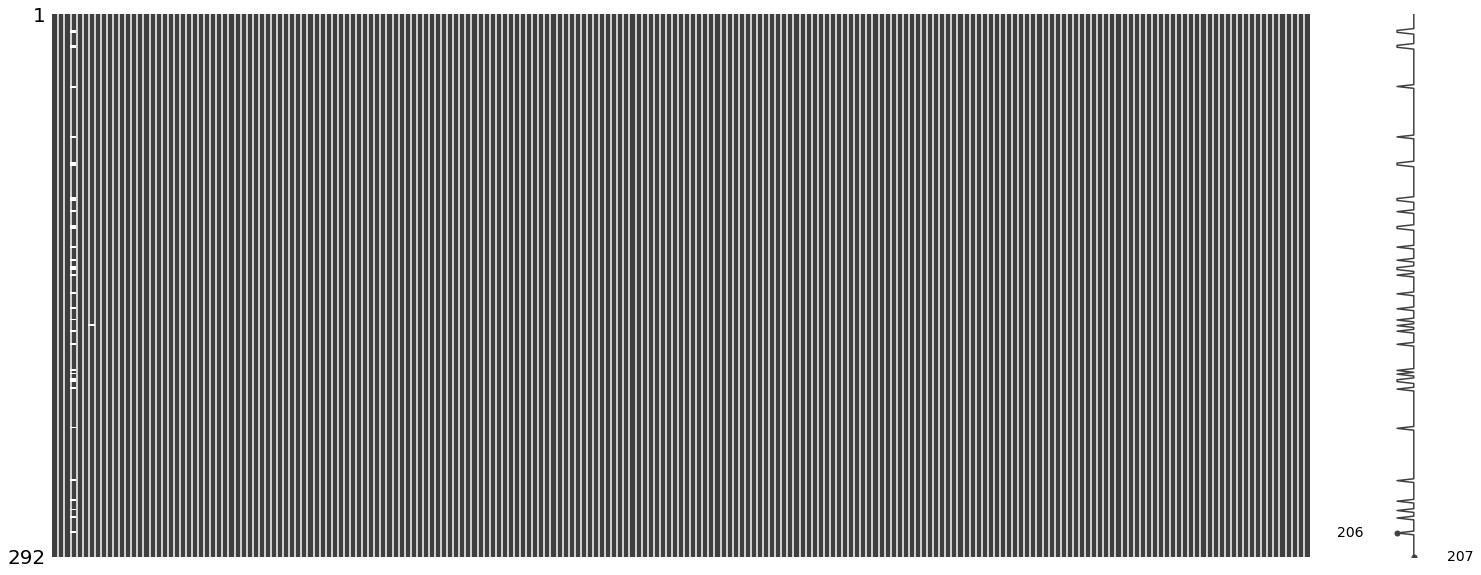

In [24]:
msno.matrix(df)

## Strategy 1: remove columns with missing values

Just avoid using the columns that have missing values in your model

## Strategy 2: Remove rows with missing values

In [25]:
df_nonull = df.dropna()

df_nonull.columns[df_nonull.isnull().any()].tolist()

[]

We can now train and test the model on this dataset

........

## Strategy 3: Imputting

Filling missing values with other values.

* Fill with constant values

In [0]:
df_inputted = df.copy()
df_inputted['BytesSent'] = df_inputted['BytesSent'].fillna(8)

You can now train and test the model on `df_inputted`

* Fill with dataset statistics

They must be computed on the training set only, in order to avoid **data leaks**.

In [0]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, 
                                     random_state=5)

mean_v = df_train['BytesSent'].mean()

df_inputted = df.copy()
df_inputted['BytesSent'] = df_inputted['BytesSent'].fillna(mean_v)

# Since the random seed is the same, the same samples will be in train and test
df_train_inputted, df_test_inputted = train_test_split(df, test_size=0.2, 
                                    shuffle=True, random_state=5)

Now you can train and test your model on the inputted dataset

# Categorical features

In [28]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 207 columns):
RelativeTime           float64
PacketsSent            int64
PacketsReceived        int64
BytesSent              float64
BytesReceived          int64
IPSrc0                 object
IPDst0                 object
Protocol0              object
PacketsSent0           int64
PacketsReceived0       int64
BytesSent0             int64
BytesReceived0         int64
IPSrc1                 object
IPDst1                 object
Protocol1              object
PacketsSent1           int64
PacketsReceived1       int64
BytesSent1             int64
BytesReceived1         int64
IPSrc2                 object
IPDst2                 object
Protocol2              object
PacketsSent2           int64
PacketsReceived2       int64
BytesSent2             int64
BytesReceived2         int64
IPSrc3                 object
IPDst3                 object
Protocol3              object
PacketsSent3           int64
PacketsR

Some interesting features are strings, but ML algorithms can only handle 

In [29]:
np.unique( df['Protocol0'] )

array(['0', 'QUIC', 'TCP', 'TLSv1.2', 'UDP'], dtype=object)